# Exercise 2.2
> A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave

> Write a class called SawtoothSignal that extends `Signal` and provides `evaluate` to evaluate a sawtooth signal.

> Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?

In [1]:
from thinkdsp import decorate, Sinusoid, normalize, unbias, TriangleSignal, SquareSignal, SinSignal, CosSignal, ParabolicSignal

import numpy as np

class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

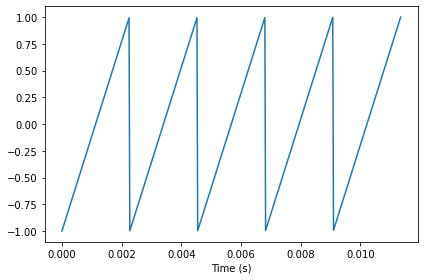

In [2]:
test_saw = SawtoothSignal()
test_wave = test_saw.make_wave(test_saw.period * 5, framerate=40000)
test_wave.plot()
decorate(xlabel='Time (s)')

In [3]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_audio()

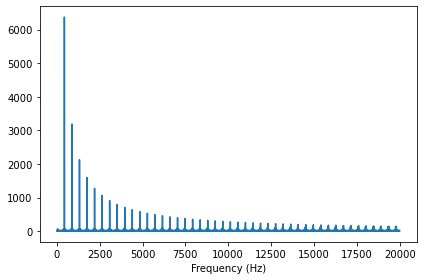

In [4]:
sawtooth.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

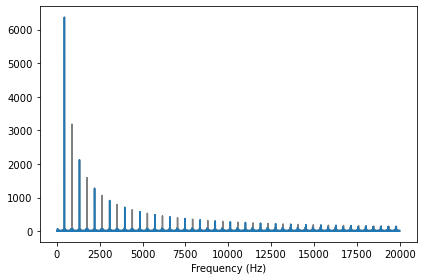

In [5]:
sawtooth.make_spectrum().plot(color='gray')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

In [6]:
square.make_audio()

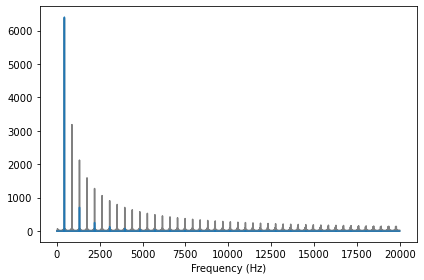

In [7]:
sawtooth.make_spectrum().plot(color='gray')
triangle = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

In [8]:
triangle.make_audio()

## Excercise 2.3
> Make a square signal at 1100 Hz and make a wave that samplesit at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?

In [9]:
signal = SquareSignal(1100)
wave = signal.make_wave(duration=0.5, framerate=10000)

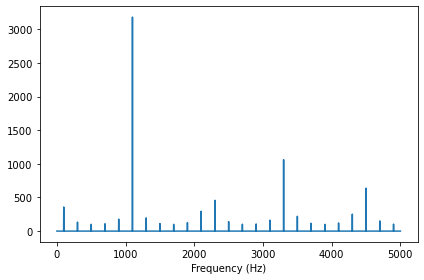

In [10]:
spectr = wave.make_spectrum()
spectr.plot()
decorate(xlabel='Frequency (Hz)')

In [11]:
wave.make_audio()

In [12]:
signal2 = SinSignal(1000)
wave2 = signal2.make_wave(duration=0.5, framerate=5000)

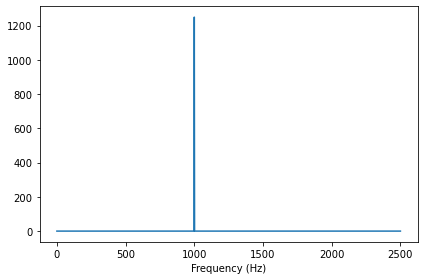

In [13]:
spectr2 = wave2.make_spectrum()
spectr2.plot()
decorate(xlabel='Frequency (Hz)')

In [14]:
wave2.make_audio()

## Exercise 2.4
> If you have a spectrum object, `spectrum`, and print the first few values of `spectrum.fs`, you’ll see that they start at zero. So `spectrum.hs[0]` is the magnitude of the component with frequency 0. But what does that mean?

> Try this experiment:
> 1. Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
> 1. Make a Spectrum object and print `spectrum.hs[0]`. What is the amplitude and phase of this component?
> 1. Set `spectrum.hs[0] = 100`.  Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?

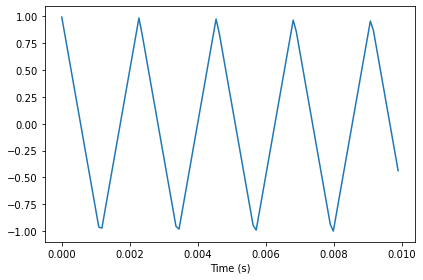

In [15]:
triangle = TriangleSignal(440)
wave = triangle.make_wave(duration=0.01)
wave.plot()
decorate(xlabel='Time (s)')

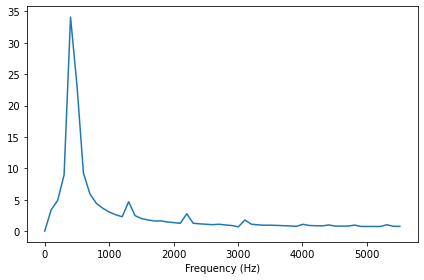

In [16]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [17]:
spectrum.hs[0]

(1.0436096431476471e-14+0j)

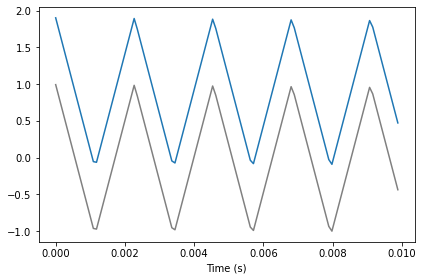

In [18]:
spectrum.hs[0] = 100
wave.plot(color='gray')
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

## Exercise 2.5
> Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of `hs` by the corresponding frequency from `fs`. Hint: since division by zero is undefined, you might want to set `spectrum.hs[0] = 0`. Test your function using a square, triangle, or sawtooth wave.
> 1. Compute the Spectrum and plot it.
> 1. Modify the Spectrum using your function and plot it again.
> 1. Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

In [19]:
def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

In [20]:
signal = SquareSignal(440)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

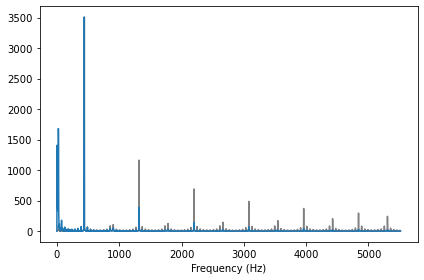

In [21]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [22]:
filtered = spectrum.make_wave()
filtered.make_audio()

## Exercise 2.6
> Triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to 1/f; the harmonics of the triangle wave drop off like 1/f2. Can you find a waveform that has even and odd harmonics that drop off like 1/f2? Hint: There are two ways you could approach this: you could construct the signal you want by adding up sinusoids, or you could start with a signal that is similar to what you want and modify it.

In [23]:
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

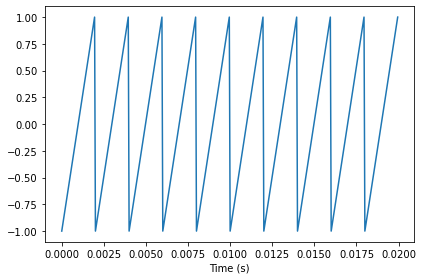

In [24]:
wave_plot = signal.make_wave(duration=signal.period*10, framerate=20000)
wave_plot.plot()
decorate(xlabel='Time (s)')

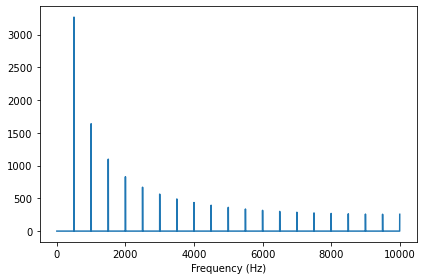

In [25]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

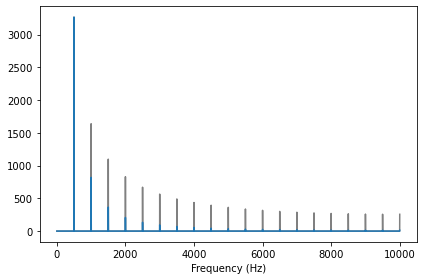

In [26]:
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [27]:
wave = spectrum.make_wave()
wave.make_audio()

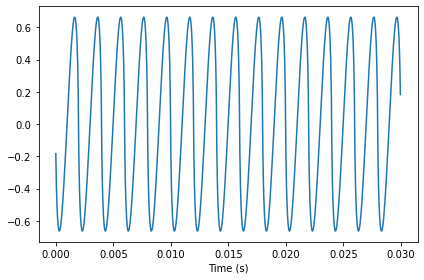

In [29]:
freqs = np.arange(500, 9500, 500)
amps = 1 / freqs**2
signal = sum(CosSignal(freq, amp) for freq, amp in zip(freqs, amps))
signal

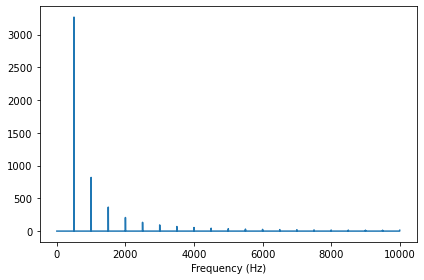

In [30]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [31]:
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

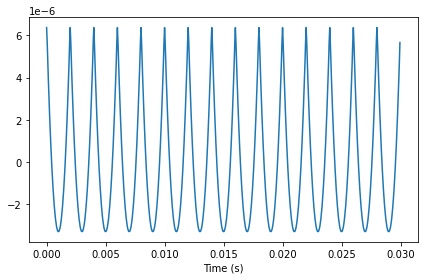

In [32]:
wave.segment(duration=0.03).plot()
decorate(xlabel='Time (s)')

In [33]:
wave = ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
wave.make_audio()

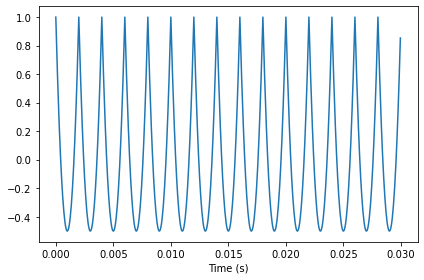

In [34]:
wave.segment(duration=0.03).plot()
decorate(xlabel='Time (s)')